In [64]:
%matplotlib inline

import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 9)
sns.set_style('whitegrid')
import numpy as np


In [65]:
# Reading the training data
price_data=pd.read_csv('Datasets/train.tsv',sep='\t')

In [3]:
# Getting the summary statistics of the data
print(price_data.describe())

           train_id  item_condition_id         price      shipping
count  1.482535e+06       1.482535e+06  1.482535e+06  1.482535e+06
mean   7.412670e+05       1.907380e+00  2.673752e+01  4.472744e-01
std    4.279711e+05       9.031586e-01  3.858607e+01  4.972124e-01
min    0.000000e+00       1.000000e+00  0.000000e+00  0.000000e+00
25%    3.706335e+05       1.000000e+00  1.000000e+01  0.000000e+00
50%    7.412670e+05       2.000000e+00  1.700000e+01  0.000000e+00
75%    1.111900e+06       3.000000e+00  2.900000e+01  1.000000e+00
max    1.482534e+06       5.000000e+00  2.009000e+03  1.000000e+00


In [4]:
# taking a back-up of our data set
# saving the original data
price_data_backup=price_data.copy()
price_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [5]:
# Identifying the missing values
price_data.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [6]:
# So, as we can see there are 6327 missing values in the column category_name and 632682 missing values in the column brand_name
# 4 missing values in the column item_description
price_data.size

11860280

In [66]:
# There are multiple ways for imputing missing data like a constant value, mean, median, mode or a
# value estimated from another predicted column

# Here, we are dealing with missing values in text column, hence we cannot assume any text data for it 
# We will drop the missing data in this case

new_price_data=price_data.dropna()

In [67]:
# Identifying the missing values after dropping the null values
new_price_data.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64

In [68]:
new_price_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.


In [69]:
# From preliminary data analysis, there does not seem any inappropriate or bad data 
# However, if we encounter any such bad data, we will deal it before applying any machine learning algorithm

Text(0.5,0,'product-paramters')

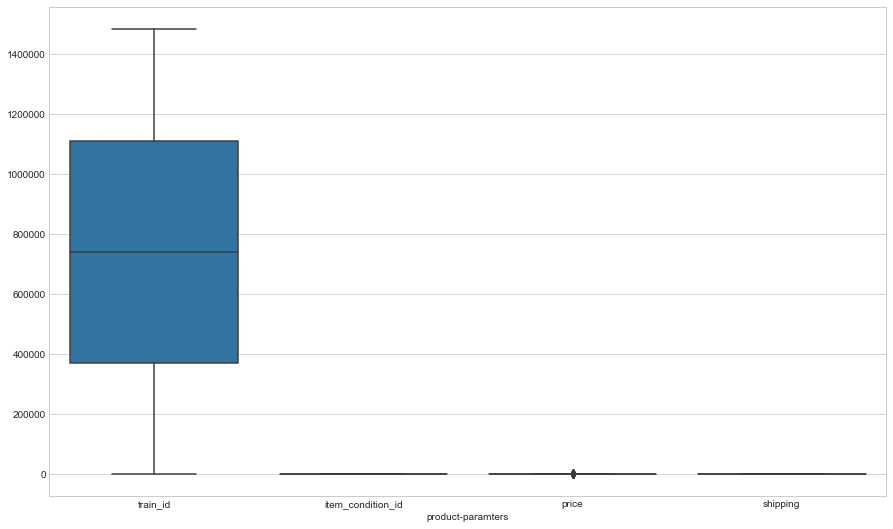

In [10]:
# For identifying outliers, box plot is very suitable. Here, I am plotting box plots for all the columns and subsequenlty, I will be 
# plotting box plots for individual columns
sns.boxplot(data=new_price_data)
plt.xlabel('product-paramters')
# From the below graph, it is unclear about the box plots and we cannot pick up the information, since there are lot of outliers 
# in the price column
# We will be plotting individual box plots below

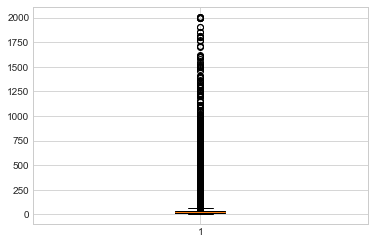

In [11]:
# In our data sets, there are only three numerical categories namely price, item condition id and shipping
# We will a box plot for these three variables 

%matplotlib inline

import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt 

plt.boxplot(new_price_data['price'])
plt.show()

# Its evident from the boxplot below that price contains a lot of outliers


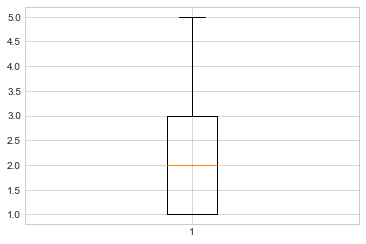

In [12]:
plt.boxplot(new_price_data['item_condition_id'])
plt.show()

# The item condition id class seems to be pretty balanced


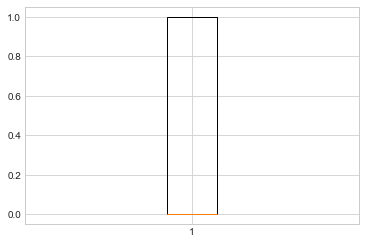

In [13]:
plt.boxplot(new_price_data['shipping'])
plt.show()


In [15]:
# Lets plot histogram for our numerical variables
# Histogram gives us a sense of distribution of data
# It gives an estimate for the probability distribution for the data

Text(0.5,0,'Price')

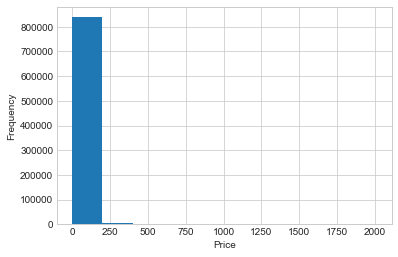

In [16]:
# Lets plot histogram for price using the plot function (OOP style)
new_price_data['price'].plot(kind='hist')
plt.xlabel('Price')
# Summary : The data is highly imbalanced. As observed the histogram in not normally distributed. It is left skewed histogram

Text(0.5,0,'Price')

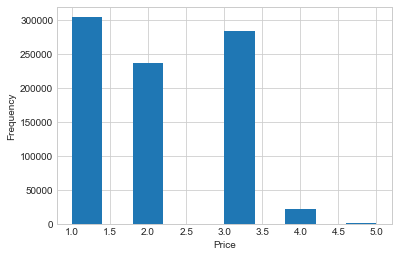

In [17]:
new_price_data['item_condition_id'].plot(kind='hist')
plt.xlabel('Price')


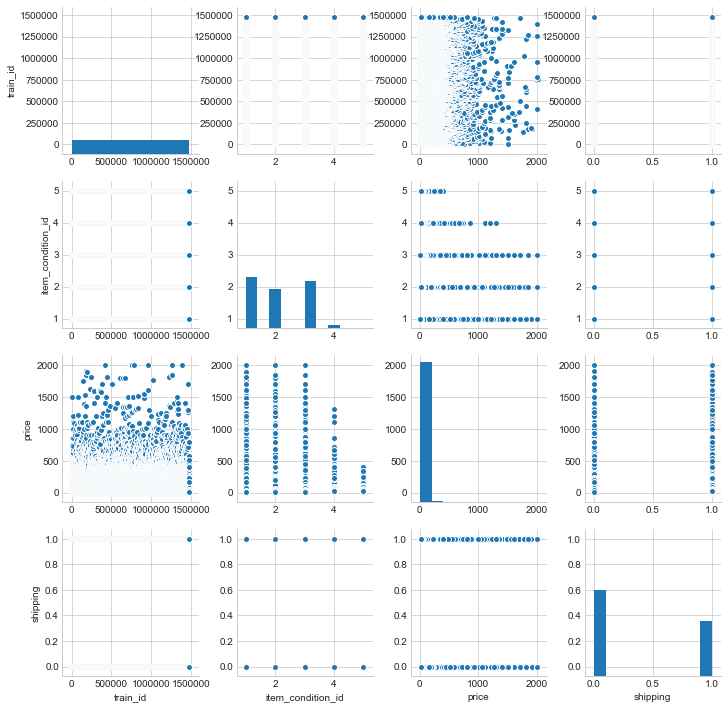

In [18]:
# Using the pairplot method of sea-born for visualizaing if there exists linear relationship or no relationship between the 
# variables of the data sets
sns.pairplot(new_price_data)
# Here, we can conclude that no two variables of our data sets are linearly co-related

In [19]:
# The dataframe.corr method computes pairwise correlation of columns, excluding NA/null values
new_price_data.corr()
# From the below observations, it is quite clear that there are no highly co-related values in the data-sets


,train_id,item_condition_id,price,shipping
train_id,1.000000,0.000473,-0.000362,0.000773
item_condition_id,0.000473,1.000000,-0.033755,-0.130235
price,-0.000362,-0.033755,1.000000,-0.067786
shipping,0.000773,-0.130235,-0.067786,1.000000


In [20]:
new_price_data.corr(method="pearson")

,train_id,item_condition_id,price,shipping
train_id,1.000000,0.000473,-0.000362,0.000773
item_condition_id,0.000473,1.000000,-0.033755,-0.130235
price,-0.000362,-0.033755,1.000000,-0.067786
shipping,0.000773,-0.130235,-0.067786,1.000000


In [21]:
new_price_data.corr(method="spearman")

,train_id,item_condition_id,price,shipping
train_id,1.000000,0.000451,-0.000025,0.000773
item_condition_id,0.000451,1.000000,-0.084965,-0.132580
price,-0.000025,-0.084965,1.000000,-0.181788
shipping,0.000773,-0.132580,-0.181788,1.000000


In [22]:
new_price_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846982 entries, 1 to 1482531
Data columns (total 8 columns):
train_id             846982 non-null int64
name                 846982 non-null object
item_condition_id    846982 non-null int64
category_name        846982 non-null object
brand_name           846982 non-null object
price                846982 non-null float64
shipping             846982 non-null int64
item_description     846982 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 98.2+ MB


# Summary about EDA

### The shape of the dataset before eliminating null values are 148253 * 8
### The columns of the data set that contains null values are textual data
### There seem to be no co-relation between the input variables
### The histogram of the target variable prices tells us that the class is highly imbalanced and is right skewed
### Since, the problem is to predict the price from the textual data, we can say that for processing textual data, we 
### try using NLP and TFIDF matrices
### From Preliminary data analysis, there does not seem any bad or inappropriate value
### The target variable contains a lot of outliers, however we cannot remove this outliers since there are numerous 
### products which can take up a range of values

In [23]:
# ------------------------------Part 2--------Data Analysis-------------------------------------------

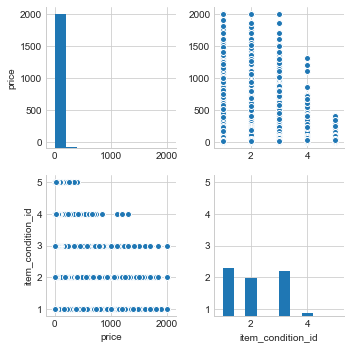

In [24]:
sns.pairplot(new_price_data[['price','item_condition_id']])

In [25]:
new_price_data['category_name'].value_counts()[:5]
# train['category_name'].value_counts()[:5]


Women/Athletic Apparel/Pants, Tights, Leggings    36456
Women/Tops & Blouses/T-Shirts                     32648
Beauty/Makeup/Face                                24706
Electronics/Video Games & Consoles/Games          19851
Beauty/Makeup/Lips                                18967
Name: category_name, dtype: int64

In [70]:
import nltk
import string
import re
import numpy as np
import pandas as pd
import pickle

from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from nltk.stem.porter import *
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction import stop_words

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline

import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook

import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger("lda").setLevel(logging.WARNING)

In [71]:
train=pd.read_csv('Datasets/train.tsv',sep='\t')
test=pd.read_csv('Datasets/test.tsv',sep='\t')


In [72]:
# Lets have a look at the size of the training data 
train.shape

(1482535, 8)

In [73]:
# Lets check the different data types in our training data set
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

Text(0.5,1,'Price Histogram')

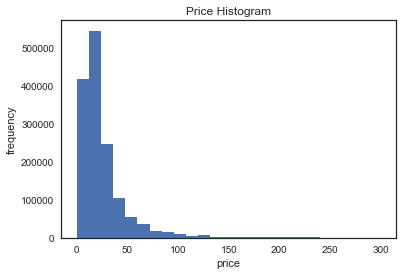

In [5]:
# We will plot a histogram for our target variable similar to above from the EDA part
(train['price']).plot.hist(bins=25,range=[0,300])
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Price Histogram')

## The log transformation can be used to make highly skewed distribution less skewed
## This can be valuable both for making pattern in the data more interpretable and for helping to meet assumptions of inferential statistics

Text(0.5,1,'Price Histogram')

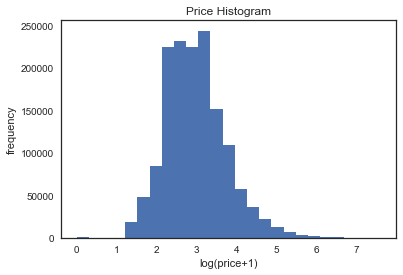

In [7]:
# We will plot a histogram for our target variable similar to above from the EDA part
np.log(train['price']+1).plot.hist(bins=25)
# (train['price']).plot.hist(bins=25,range=[0,300])
plt.xlabel('log(price+1)')
plt.ylabel('frequency')
plt.title('Price Histogram')

In [8]:
# The above figure gives us some sense of the distribution of our target variable price

### Analysis of Shipping paramter

### If the shipping paramter is 1, then the shipping fee is paid by the seller, if 0, then the shipping fee is paid by the 
### buyer

### Here, we can clearly witness that the average price paid by the users who have to pay for shipping is greater ### than the price they dont have to pay shipping for 

### This drives us the simple conclusion that sellers have to put up a lower price to compensate the shipping price ### by user


In [9]:
train.shipping.value_counts()/len(train)


0    0.552726
1    0.447274
Name: shipping, dtype: float64

## Lets try to delve more into item category
## Here, we see that there are 1287 unique categories and each category is divided into three sub categories

In [11]:
print("There are %d unique values categories" % train['category_name'].nunique())


There are 1287 unique values categories


In [12]:
# Lets look at the count of top categories and how the sub categories look like 
train['category_name'].value_counts()[:10]

Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Blouse                                    20284
Women/Tops & Blouses/Tank, Cami                                20284
Name: category_name, dtype: int64

In [13]:
# Also, as seen from Part A- EDA , there are about 6327 items that do not have a category label

train['category_name'].isnull().sum()

6327

In [14]:
# To make things more simpler and to apply our further machine learning algorithms, lets separate out the categories into different columns


In [15]:
def split(text):
    try: return text.split("/")
    except: return ("None", "None", "None")

In [74]:
train['Main_Category'], train['Sub_Category_1'], train['Sub_Category_2'] = zip(*train['category_name'].apply(lambda x: split(x)))
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,Main_Category,Sub_Category_1,Sub_Category_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [75]:
# Lets check how many unique sub categories do we have

print(train['Sub_Category_1'].nunique())
print(train['Sub_Category_2'].nunique())

114
871


In [76]:
Main_Category = train['Main_Category'].unique()
Main_Category

array(['Men', 'Electronics', 'Women', 'Home', 'Sports & Outdoors',
       'Vintage & Collectibles', 'Beauty', 'Other', 'Kids', 'None',
       'Handmade'], dtype=object)

In [135]:
x = [train.loc[train['Main_Category']==category, 'price'] for category in Main_Category]


In [136]:
x

[0           10.0
 25          66.0
 37           6.0
 64          36.0
 78           9.0
 98          49.0
 116         51.0
 125         60.0
 137         66.0
 145        250.0
 151         14.0
 198         54.0
 224         22.0
 227         14.0
 256         10.0
 268          7.0
 312         18.0
 313         26.0
 314         12.0
 349         40.0
 350         33.0
 352          9.0
 353         18.0
 374         12.0
 385         23.0
 392         25.0
 416         10.0
 432          7.0
 437         41.0
 438         61.0
            ...  
 1482087      9.0
 1482118     18.0
 1482134     30.0
 1482140    206.0
 1482146     22.0
 1482153     36.0
 1482163     21.0
 1482164     15.0
 1482193     18.0
 1482197     10.0
 1482210     17.0
 1482227     71.0
 1482240     16.0
 1482272     14.0
 1482277     34.0
 1482284     14.0
 1482305     16.0
 1482330     11.0
 1482332     24.0
 1482361     12.0
 1482370     10.0
 1482371     21.0
 1482399     25.0
 1482423     20.0
 1482449  

In [79]:
def wordCount(text):
    try:
#         making all the text to lowercase
        text = text.lower()
#     defining the pattern for regex
        regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')
        txt = regex.sub(" ", text)
#         get only those sentences whose length are greater than 3
        words = [w for w in txt.split(" ") if not w in stop_words.ENGLISH_STOP_WORDS and len(w)>3]
        return len(words)
    except: 
        return 0

In [80]:
train['descritption_length'] = train['item_description'].apply(lambda x: wordCount(x))


In [81]:
df = train.groupby('descritption_length')['price'].mean().reset_index()


In [114]:
trace1 = go.Scatter(
    x = df['descritption_length'],
    y = np.log(df['price']+1),
    mode = 'lines+markers',
    name = 'lines+markers'
)
layout = dict(title= 'Mean Log(Price) by Description Length',
              yaxis = dict(title='Mean Log(Price)'),
              xaxis = dict(title='Length of the description'))
fig=dict(data=[trace1], layout=layout)
py.iplot(fig)

### This part of our analysis will include how the description of the product influences the price of the product.
### Here, we will take help of natural language processing to process text data and visualization library to show   interesting findings like how the length of the description affects the price 

In [83]:
stop = set(stopwords.words('english'))
def tokenize(text):
    
    try: 
        regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')
        text = regex.sub(" ", text) # remove punctuation
#         sent_tokenize segments the text into sentences
        tokens_ = [word_tokenize(s) for s in sent_tokenize(text)]
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent
        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        filtered_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
        filtered_tokens = [w.lower() for w in filtered_tokens if len(w)>=3]
        
        return filtered_tokens
            
    except TypeError as e: print(text,e)

## Since, we are dealing with text data and are supposed to find out price based on this text data, it makes a lot of sense for us to find which words carry how much weightage.  Major part of our analysis will include text pre-processing and finding the term frequency and inverse term frequency of our data-sets.

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,
                             max_features=200000,
                             tokenizer=tokenize,
                             ngram_range=(1, 2))

In [121]:
test['desc_len'] = test['item_description'].apply(lambda x: wordCount(x))
train['tokens'] = train['item_description'][:500].map(tokenize)
test['tokens'] = test['item_description'][:500].map(tokenize)


In [128]:
from sklearn.cluster import MiniBatchKMeans
all_desc = np.append(train['item_description'][:500].values,test['item_description'][:500].values)

num_clusters = 25 # Trial and Error
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters,
                               init='k-means',
                               n_init=1,
                               init_size=1000, batch_size=1000, verbose=0, max_iter=1000)
vect = vectorizer.fit_transform(list(all_desc))

In [129]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

In [130]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(15)


,tfidf
new,2.156182
size,2.329025
brand,2.778856
brand new,2.891475
condition,2.918322
free,2.952928
shipping,3.041220
used,3.254794
worn,3.264364
never,3.293634


In [131]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(15)


,tfidf
button,5.51086
looks,5.51086
store,5.51086
sleeves,5.51086
discount,5.51086
size fits,5.51086
shoulder,5.51086
free pet,5.51086
pack,5.51086
business,5.51086


## Our final analysis consists of K-means clustering, where we will utilize the k-means algorithm for clustering the similar words together which can give us insight about a lot of things. 


In [132]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 25 # Trial and Error
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters,
                               init='k-means++',
                               n_init=1,
                               init_size=1000, batch_size=1000, verbose=0, max_iter=1000)

In [133]:
kmeans = kmeans_model.fit(vect)
kmeans_clusters = kmeans.predict(vect)
kmeans_distances = kmeans.transform(vect)

In [134]:
centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(num_clusters):
    print("Cluster %d:" % i)
    words = ''
    for j in centroids[i, :10]:
        words += terms[j] + ' || '
    print(words)
    print() 

Cluster 0:
wear || size || like || zipper || hard || gray || great || great condition || green || grey || 

Cluster 1:
new box || box || new || authentic || brand || brand new || color || firm || leather || holds || 

Cluster 2:
please || condition || ask questions || please ask || different || zip || minor || thank || full || take || 

Cluster 3:
shipping || free shipping || free || new || brand || brand new || firm || price || size || beautiful || 

Cluster 4:
description yet || yet || description || zipper || high || gray || great || great condition || green || grey || 

Cluster 5:
pet free || pet || free home || smoke || home || free || fun || closet || fast || flaws || 

Cluster 6:
new || brand new || brand || selling || shipping || bought || photos || super cute || sealed || cute || 

Cluster 7:
great condition || great || condition || size || flaws || box || worn || boys || comes || minor || 

Cluster 8:
size || new || brand || brand new || one || black || used || pink || top ||